# <center>Basic Graph Operations</center>
## Domain: Finance
Here dealing with Annual Income and Amount spend on wine .<br>
## Objective:To perform basic Graph operations on the chosen Superstore dataset
## Description of the Dataset (Superstore data set):

A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499 dollars  which is 999 dollar on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them.It contains various attributes related to customer demographics and their purchase history.<br>

## About Nodes and Edges

1)Nodes (Vertices):<br>
In the graph each node represents a unique customer identified by their ID. This ensures that every customer is treated as a distinct entity within the graph, allowing us to analyze relationships and behaviors .

2)Edges:<br>
Edges are established between nodes (customers) based on two key attributes: Annual Income and Amount Spent on Wine Products.<br>
The criteria for creating an edge between two customers are:<br>

Income Similarity: Customers are connected if the difference in their annual incomes is below a specified threshold (e.g., $10,000). This criterion helps in identifying customers with similar economic backgrounds, which might influence their purchasing behaviors. <br>

Wine Expenditure Similarity: Customers are also connected if the difference in their expenditure on wine products is below a specified threshold (e.g., $200). This criterion focuses on specific purchasing behavior, providing insights into customer preferences and spending habits related to wine products.



# Step 1: Load and Preprocess the Dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('superstore_data.csv')  
data_subset = data.head(20)  #  first 20 rows for simplicity
print(data_subset.head())


      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3   11/5/2014        0        10  ...                0                 0   
4    8/4/2014        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurch

# Step 2: Select Relevant Attributes
For constructing the graph, we will choose a few relevant attributes such as:

ID (Unique identifier for each customer)<br>
Income (Yearly household income)<br>
MntWines (Amount spent on wine products in the last 2 years)<br>


# Step 3: Define Nodes and Edge


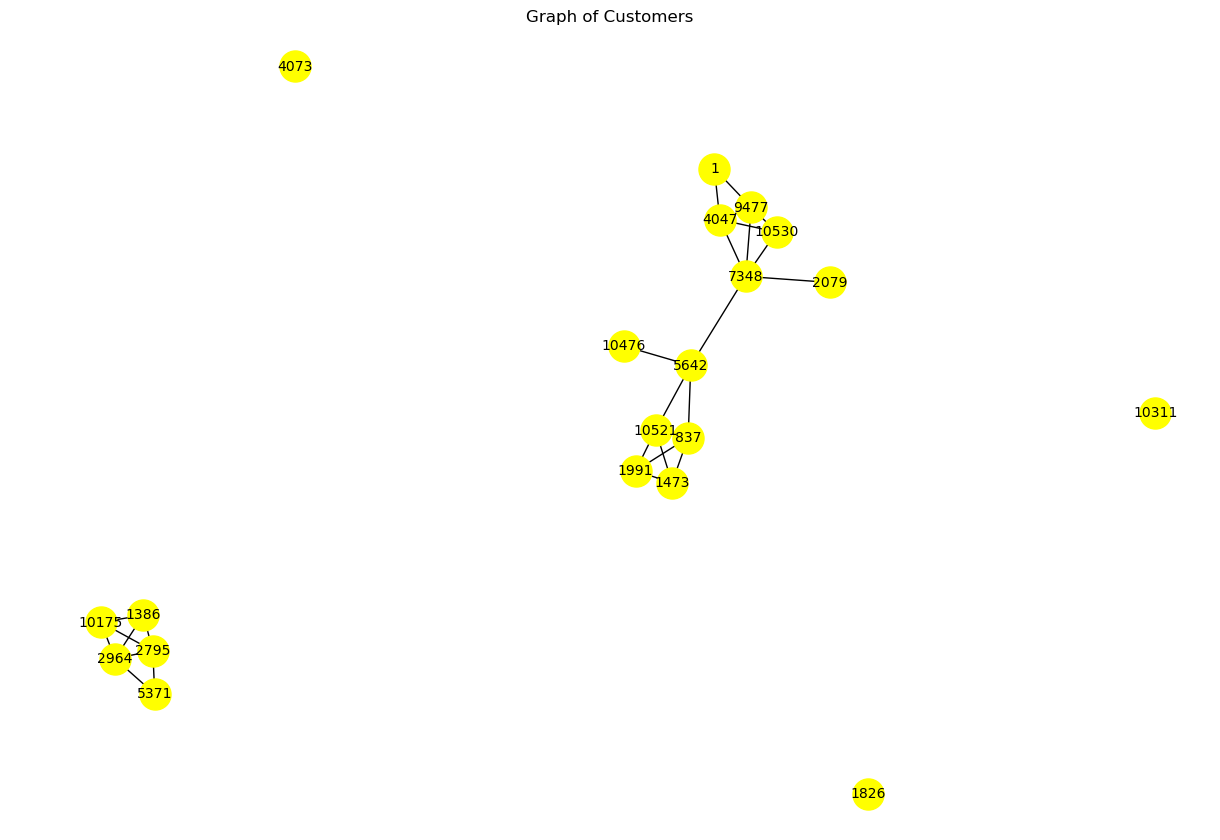

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Initialize the graph
G = nx.Graph()

# Adding vertices (nodes) using customer IDs
for customer_id in data_subset['Id']:
    G.add_node(str(customer_id))

# Adding edges based on a similarity criterion
threshold_income = 10000  # Define a threshold for income similarity
threshold_wine = 200  # Define a threshold for wine expenditure similarity

for i in range(len(data_subset)):
    for j in range(i + 1, len(data_subset)):
        id_i = str(data_subset.iloc[i]['Id'])
        id_j = str(data_subset.iloc[j]['Id'])
        
        income_i = data_subset.iloc[i]['Income']
        income_j = data_subset.iloc[j]['Income']
        
        wine_i = data_subset.iloc[i]['MntWines']
        wine_j = data_subset.iloc[j]['MntWines']
        
        if abs(income_i - income_j) < threshold_income and abs(wine_i - wine_j) < threshold_wine:
            G.add_edge(id_i, id_j)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='yellow', edge_color='black', node_size=500, font_size=10)
plt.title('Graph of Customers')
plt.show()


Nodes: Each node represents a customer, identified by their unique ID.<br>
Edges: Edges are created between nodes if the absolute difference in their Income is less than threshold_income and the absolute difference in their MntWines expenditure is less than threshold_wine. This implies that customers with similar income and spending habits on wine products are connected.<br>
#### =>The purpose of the nested loop is to compare each customer with every other customer to determine if an edge (relationship) should be added between them based on their annual income and the amount they spend on wine products.
#### =>Outer Loop (for i in range(len(data_subset))): This loop iterates over each customer in the dataset.Inner Loop (for j in range(i + 1, len(data_subset))): This loop iterates over each customer that comes after the current customer in the outer loop. This ensures that each pair of customers is only compared once.
#### =>id_i and id_j: Extract the customer IDs for the two customers being compared in this iteration.
#### =>income_i and income_j: Extract the annual incomes for the two customers being compared.
#### =>wine_i and wine_j: Extract the amounts spent on wine products for the two customers being compared.
#### =>Comparison: The if statement checks two conditions:
->The absolute difference in their annual incomes (abs(income_i - income_j)) is less than the specified threshold_income.<br>
->The absolute difference in their spending on wine products is less than the specified threshold_wine.<br>
->Edge Creation: If both conditions are satisfied, an edge is added between the two customer nodes (id_i and id_j) in the graph G.<br>

In [3]:
# Adjacency Matrix
adj_matrix = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:")
print(adj_matrix)

# Adjacency List
adj_list = {node: list(G.neighbors(node)) for node in G.nodes()}
print("\nAdjacency List:")
print(adj_list)


# Edge List
edge_list = list(G.edges())
print("\nEdge List:")
print(edge_list)

Adjacency Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0]
 [0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]]

Adjacency List:
{'1826': [], '1': ['4047', '9477'], '10476': ['5642'], '1386': ['2964', '10175', '2795'], '5371': ['2964

Adjacency Matrix: This represents the connections between nodes in a matrix form, where each cell [i, j] indicates the presence (1) or absence (0) of an edge between node i and node j.<br>
Adjacency List: This is a dictionary where each key is a node and the value is a list of its neighboring nodes.<br>
Edge List: This is a list of tuples, where each tuple represents an edge between two nodes.

# Step 4: Perform Basic Graph Operations

# Adding a new Vertex


Added vertex: 10531


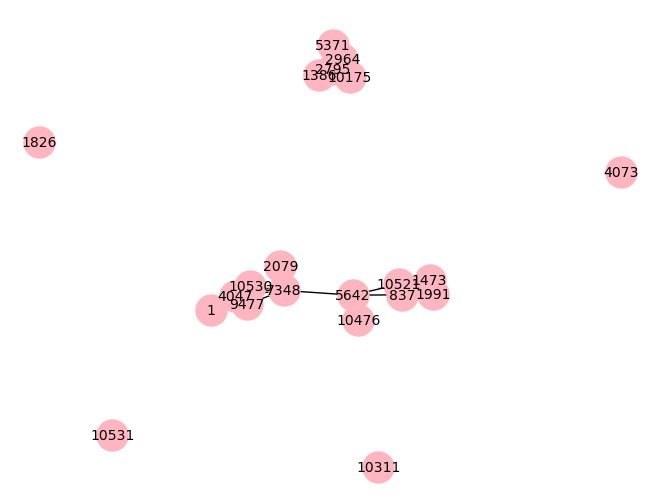

In [4]:
new_customer_id = str(max(data_subset['Id']) + 1)
G.add_node(new_customer_id)
print("\nAdded vertex:", new_customer_id)
nx.draw(G, with_labels=True, node_color='lightpink', edge_color='black', node_size=500, font_size=10)
plt.show()


### Here it finds the maximum customer id and adds one to it, so that it gives a unique id.Later its converted into string as its stored as string.

# Removing a Vertex

Removed vertex: 10531


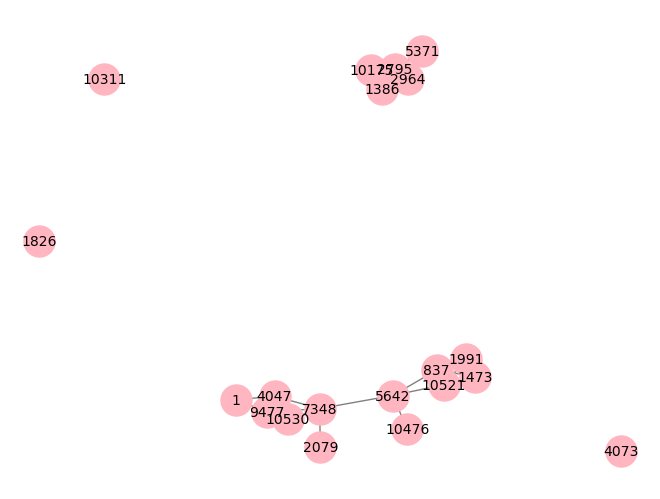

In [5]:
G.remove_node(new_customer_id)
print("Removed vertex:", new_customer_id)
nx.draw(G, with_labels=True, node_color='lightpink', edge_color='gray', node_size=500, font_size=10)
plt.show()


### Here we are removing the id that we have added in the above step

# Adding a New Edge


Added edge: ('1826', '1')


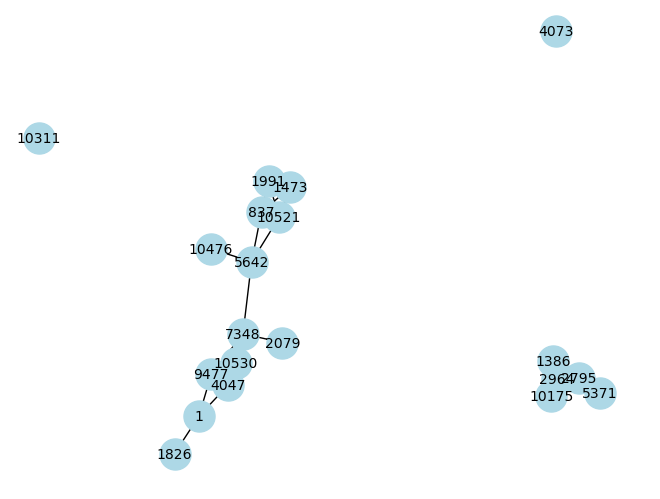

<Figure size 600x800 with 0 Axes>

In [6]:
G.add_edge(str(data_subset.iloc[0]['Id']), str(data_subset.iloc[1]['Id']))
print("\nAdded edge:", (str(data_subset.iloc[0]['Id']), str(data_subset.iloc[1]['Id'])))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='black', node_size=500, font_size=10)
plt.figure(figsize=(6,8))
plt.show()


### Here we retrieves customer id of first and second customer , and added an edge between them.

# Removing an Edge

Removed edge: ('1826', '1')


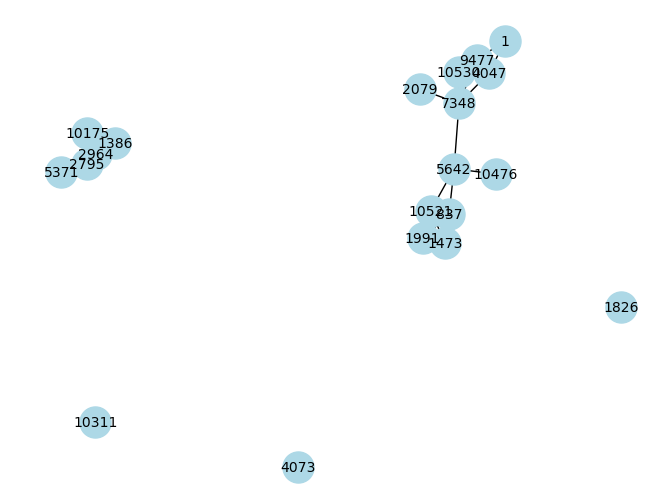

In [7]:
G.remove_edge(str(data_subset.iloc[0]['Id']), str(data_subset.iloc[1]['Id']))
print("Removed edge:", (str(data_subset.iloc[0]['Id']), str(data_subset.iloc[1]['Id'])))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='black', node_size=500, font_size=10)
plt.show()


### Removed the edge which is added in the above step

# Step 5: Advanced Graph Operations

# Splitting a Vertex

After splitting vertex: ['1826', '1', '1386', '5371', '7348', '4073', '1991', '4047', '9477', '2079', '5642', '10530', '2964', '10311', '837', '10521', '10175', '1473', '2795', '10476A', '10476B'] [('1', '4047'), ('1', '9477'), ('1386', '2964'), ('1386', '10175'), ('1386', '2795'), ('5371', '2964'), ('5371', '2795'), ('7348', '4047'), ('7348', '9477'), ('7348', '2079'), ('7348', '5642'), ('7348', '10530'), ('1991', '837'), ('1991', '10521'), ('1991', '1473'), ('4047', '9477'), ('4047', '10530'), ('9477', '10530'), ('5642', '837'), ('5642', '10521'), ('5642', '10476A'), ('5642', '10476B'), ('2964', '10175'), ('2964', '2795'), ('837', '10521'), ('837', '1473'), ('10521', '1473'), ('10175', '2795')]


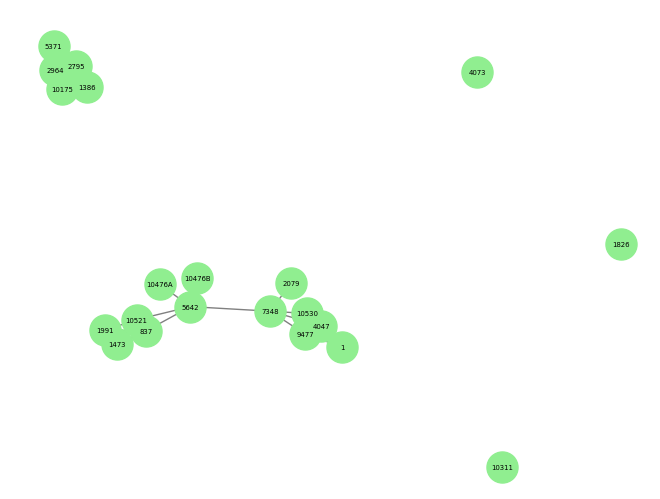

In [8]:
def split_vertex(G, vertex, new_vertices):
    neighbors = list(G.neighbors(vertex))
    G.remove_node(vertex)
    G.add_nodes_from(new_vertices)
    for neighbor in neighbors:
        for new_vertex in new_vertices:
            G.add_edge(new_vertex, neighbor)

# Example: Splitting a customer node into two new nodes
split_vertex(G, str(data_subset.iloc[2]['Id']), [str(data_subset.iloc[2]['Id']) + 'A', str(data_subset.iloc[2]['Id']) + 'B'])
print("After splitting vertex:", G.nodes(), G.edges())
nx.draw(G, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=500, font_size=5)
plt.show()


###  Here we are  defining a function split_vertex which is taking 3 parameters ,and then it will take the list of neighbours of the node to be split and remove the original vertex.Later the splitted nodes is connected to the original graph , where edges are created with new vertices and neighbors.
### Here 3rd customer is splitted into A and B.

# Merging Two Vertices

After merging vertices: ['1826', '1', '1386_5371', '7348', '4073', '1991', '4047', '9477', '2079', '5642', '10530', '2964', '10311', '837', '10521', '10175', '1473', '2795', '10476A', '10476B'] [('1', '4047'), ('1', '9477'), ('1386_5371', '2964'), ('1386_5371', '10175'), ('1386_5371', '2795'), ('7348', '4047'), ('7348', '9477'), ('7348', '2079'), ('7348', '5642'), ('7348', '10530'), ('1991', '837'), ('1991', '10521'), ('1991', '1473'), ('4047', '9477'), ('4047', '10530'), ('9477', '10530'), ('5642', '837'), ('5642', '10521'), ('5642', '10476A'), ('5642', '10476B'), ('2964', '10175'), ('2964', '2795'), ('837', '10521'), ('837', '1473'), ('10521', '1473'), ('10175', '2795')]


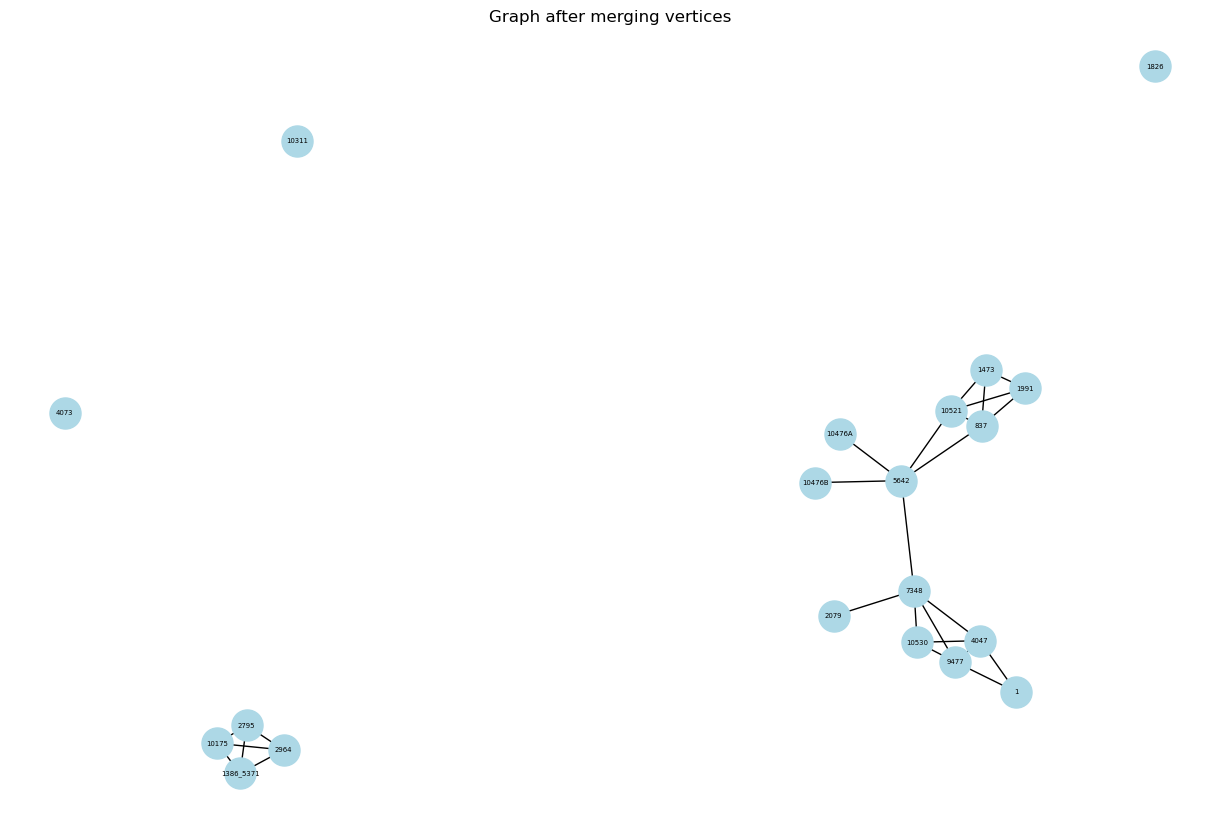

In [9]:
G = nx.contracted_nodes(G, str(data_subset.iloc[3]['Id']), str(data_subset.iloc[4]['Id']), self_loops=False)
G = nx.relabel_nodes(G, {str(data_subset.iloc[3]['Id']): str(data_subset.iloc[3]['Id']) + '_' + str(data_subset.iloc[4]['Id'])})
print("After merging vertices:", G.nodes(), G.edges())
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='black', node_size=500, font_size=5)
plt.title('Graph after merging vertices')
plt.show()


### Here we are merging 2 nodes , where the 5 th customer is merged to the 4th customer.

## Conclusion:
### In this project, I have explored how to analyze relationships using graph analytics with NetworkX. By visualizing and manipulating data connections through nodes and edges, I have gained valuable insights into complex datasets. These operations are crucial for understanding data patterns and making informed decisions in diverse fields.